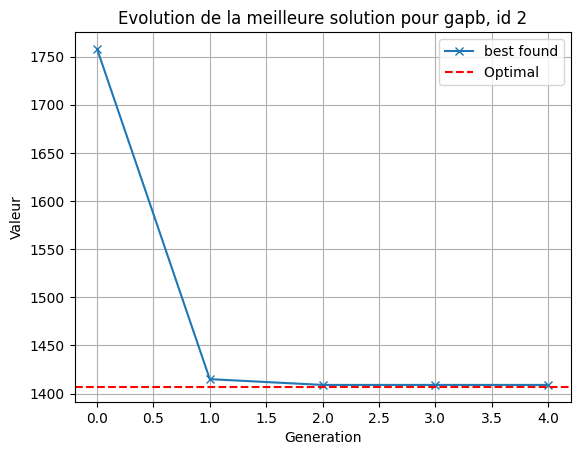

In [1]:
import csv
import matplotlib.pyplot as plt

# Load optimal values from the new `val_opt.csv` format
optimal_values = {}  # Dictionary to store optimal values by (instance, ID)
with open("val_opt.csv", mode="r") as file:
    reader = csv.DictReader(file)
    
    for row in reader:
        instance_id = (row['instance'], row['id'])  # Key by (instance, id)
        optimal_values[instance_id] = int(row['val'])  # Store the optimal value as an integer

# Specify the instance and run ID you want to focus on
target_instance = "gapb"  # Replace with your desired instance name
target_run_id = "2"  # Replace with the desired run ID

# Load the results from the `optimal_evaluations_min.csv` file and perform the analysis
with open("resultats_T/optimal_evaluations_min.csv", mode="r") as file:
    reader = csv.reader(file)
    header = next(reader)  # Skip the header
    
    for row in reader:
        instance_name = row[0]  # Instance name (e.g., gap1)
        run_id = str(int(row[1]) - 1)  # Run ID (adjusted by -1 to match the format)
        
        # Filter by the target instance and run ID
        if instance_name != target_instance or run_id != target_run_id:
            continue
        
        # Convert generation values to floats
        gen_values = [float(val) for val in row[2:-4] if val]
        
        # Get the optimal value for the instance and run ID
        optimal_value = optimal_values.get((instance_name, run_id), None)
        
        if optimal_value is not None and gen_values:
            # Plot the evolution of the best solution for this instance and run
            plt.plot(gen_values, label=f"best found", marker ='x')
            plt.axhline(y=optimal_value, color='r', linestyle='--', label=f"Optimal ")

# Customize the plot
plt.title(f"Evolution de la meilleure solution pour {target_instance}, id {target_run_id}")
plt.xlabel("Generation")
plt.ylabel("Valeur")
#plt.yscale('log')
plt.legend(loc='best')
plt.grid(True)
plt.show()


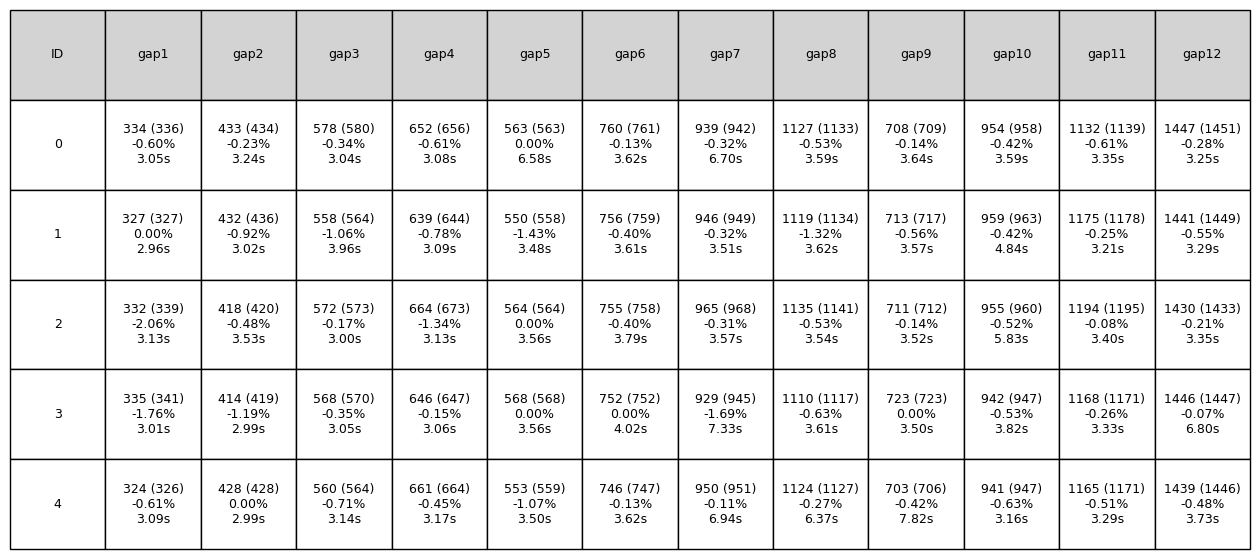

Average Relative Difference: -0.51%


In [26]:
import csv
import ast
import matplotlib.pyplot as plt
from matplotlib.table import Table

# Initialize dictionary to store results
results = {}

# Load optimal values from the new `val_opt.csv` format
optimal_values = {}  # Dictionary to store optimal values by (instance, ID)
with open("val_opt.csv", mode="r") as file:
    reader = csv.DictReader(file)
    
    for row in reader:
        # Use (instance, id) as the key; `id` remains as a string to match the format
        instance_id = (row['instance'], row['id'])
        optimal_values[instance_id] = int(row['val'])  # Store the `val` as an integer

# Load the results from the first CSV file and organize them in the results dictionary
with open("resultats_T/optimal_evaluations.csv", mode="r") as file:
    reader = csv.reader(file)
    header = next(reader)
    
    for row in reader:
        instance_name = row[0]  # Instance name (e.g., gapa)
        run_id = str(int(row[1]) - 1)  # Run ID as an integer (adjusted to match your format)
        
        # Convert generation values to integers and find the best (last) value
        gen_values = [int(val) for val in row[2:-1] if val]  # All values except last one
        best_value = gen_values[-1] if gen_values else None
        
        # Get the execution time (last value in the row)
        execution_time = float(row[-1])  # Last value of the row represents execution time
        
        # Get the optimal value for the instance and run ID
        optimal_value = optimal_values.get((instance_name, run_id), None)
        
        # If both best_value and optimal_value are found, store the results
        if optimal_value is not None and best_value is not None:
            # Calculate the difference and relative difference
            difference = best_value - optimal_value
            relative_difference = (difference / optimal_value) * 100 if optimal_value != 0 else None
            
            # Store the results in the results dictionary
            if instance_name not in results:
                results[instance_name] = {}
            results[instance_name][run_id] = {
                'optimal_value': optimal_value,
                'best_value': best_value,
                'difference': difference,
                'relative_difference': relative_difference,
                'execution_time': execution_time
            }

# Prepare the data for the matplotlib table
columns = ['ID'] + list(results.keys())
rows = []

# Find all run IDs
run_ids = set(run_id for instance in results.values() for run_id in instance.keys())
run_ids = sorted(run_ids)  # Sort the Run IDs

# Add data rows
for run_id in run_ids:
    row = [run_id]
    for instance_name in results:
        if run_id in results[instance_name]:
            data = results[instance_name][run_id]
            cell_content = (f'{data['best_value']} ({data['optimal_value']})\n'
                       f'{data['relative_difference']:.2f}%\n'
                       f'{data['execution_time']:.2f}s'
                       )
            row.append(cell_content)  # Add best value to row
        else:
            row.append('')  # Add empty cell if data is missing
    rows.append(row)

# Create the plot and add the table
fig, ax = plt.subplots(figsize=(16, 7))  # Adjust figure size based on number of rows
ax.axis('off')  # Turn off the axis

# Create the table
table = Table(ax, bbox=[0, 0, 1, 1])

# Add column labels
for col, column_name in enumerate(columns):
    table.add_cell(0, col, width=1.0 / len(columns), height=1.0 / len(rows), text=column_name, loc='center', facecolor='lightgray')

# Add row labels and data cells
for row_num, row in enumerate(rows):
    for col_num, cell_value in enumerate(row):
        table.add_cell(row_num + 1, col_num, width=1.0 / len(columns), height=1.0 / len(rows), text=cell_value, loc='center')

# Add the table to the axis
ax.add_table(table)

# Display the plot
plt.show()

# Calculate the average relative difference
total_relative_difference = 0
relative_difference_count = 0

for instance_data in results.values():
    for run_data in instance_data.values():
        if run_data['relative_difference'] is not None:
            total_relative_difference += run_data['relative_difference']
            relative_difference_count += 1

average_relative_difference = total_relative_difference / relative_difference_count if relative_difference_count > 0 else 0

# Print the average relative difference
print(f'Average Relative Difference: {average_relative_difference:.2f}%')

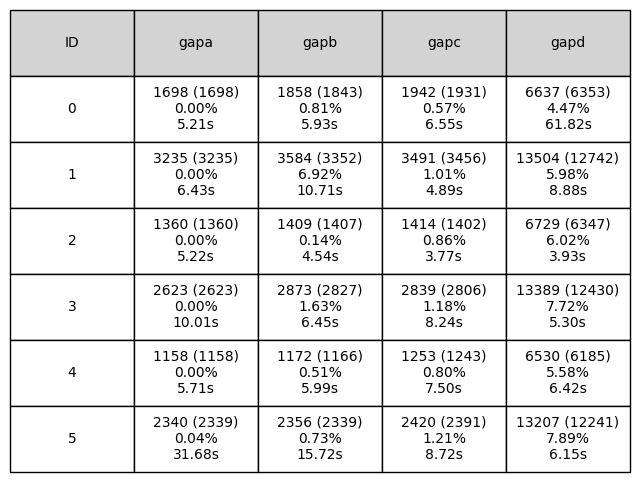

Average Relative Difference: 2.25%


In [27]:
import csv
import ast
import matplotlib.pyplot as plt
from matplotlib.table import Table

# Initialize dictionary to store results
results = {}

# Load optimal values from the new `val_opt.csv` format
optimal_values = {}  # Dictionary to store optimal values by (instance, ID)
with open("val_opt.csv", mode="r") as file:
    reader = csv.DictReader(file)
    
    for row in reader:
        # Use (instance, id) as the key; `id` remains as a string to match the format
        instance_id = (row['instance'], row['id'])
        optimal_values[instance_id] = int(row['val'])  # Store the `val` as an integer

# Load the results from the first CSV file and organize them in the results dictionary
with open("resultats_T/optimal_evaluations_min.csv", mode="r") as file:
    reader = csv.reader(file)
    header = next(reader)
    
    for row in reader:
        instance_name = row[0]  # Instance name (e.g., gapa)
        run_id = str(int(row[1]) - 1)  # Run ID as an integer (adjusted to match your format)
        
        # Convert generation values to integers and find the best (last) value
        gen_values = [int(val) for val in row[2:-1] if val]  # All values except last one
        best_value = gen_values[-1] if gen_values else None
        
        # Get the execution time (last value in the row)
        execution_time = float(row[-1])  # Last value of the row represents execution time
        
        # Get the optimal value for the instance and run ID
        optimal_value = optimal_values.get((instance_name, run_id), None)
        
        # If both best_value and optimal_value are found, store the results
        if optimal_value is not None and best_value is not None:
            # Calculate the difference and relative difference
            difference = best_value - optimal_value
            relative_difference = (difference / optimal_value) * 100 if optimal_value != 0 else None
            
            # Store the results in the results dictionary
            if instance_name not in results:
                results[instance_name] = {}
            results[instance_name][run_id] = {
                'optimal_value': optimal_value,
                'best_value': best_value,
                'difference': difference,
                'relative_difference': relative_difference,
                'execution_time': execution_time
            }

# Prepare the data for the matplotlib table
columns = ['ID'] + list(results.keys())
rows = []

# Find all run IDs
run_ids = set(run_id for instance in results.values() for run_id in instance.keys())
run_ids = sorted(run_ids)  # Sort the Run IDs

# Add data rows
for run_id in run_ids:
    row = [run_id]
    for instance_name in results:
        if run_id in results[instance_name]:
            data = results[instance_name][run_id]
            cell_content = (f'{data['best_value']} ({data['optimal_value']})\n'
                       f'{data['relative_difference']:.2f}%\n'
                       f'{data['execution_time']:.2f}s'
                       )
            row.append(cell_content)  # Add best value to row
        else:
            row.append('')  # Add empty cell if data is missing
    rows.append(row)

# Create the plot and add the table
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust figure size based on number of rows
ax.axis('off')  # Turn off the axis

# Create the table
table = Table(ax, bbox=[0, 0, 1, 1])

# Add column labels
for col, column_name in enumerate(columns):
    table.add_cell(0, col, width=1.0 / len(columns), height=1.0 / len(rows), text=column_name, loc='center', facecolor='lightgray')

# Add row labels and data cells
for row_num, row in enumerate(rows):
    for col_num, cell_value in enumerate(row):
        table.add_cell(row_num + 1, col_num, width=1.0 / len(columns), height=1.0 / len(rows), text=cell_value, loc='center')

# Add the table to the axis
ax.add_table(table)

# Display the plot
plt.show()


# Calculate the average relative difference
total_relative_difference = 0
relative_difference_count = 0

for instance_data in results.values():
    for run_data in instance_data.values():
        if run_data['relative_difference'] is not None:
            total_relative_difference += run_data['relative_difference']
            relative_difference_count += 1

average_relative_difference = total_relative_difference / relative_difference_count if relative_difference_count > 0 else 0

# Print the average relative difference
print(f'Average Relative Difference: {average_relative_difference:.2f}%')

In [ ]:
import csv
import init_sol
import operations_algo_genetique as op
import numpy as np
import time
import os
import csv

max_time = 10
max_amelio = 0.1
taille_pop = 20
Nb_gen_max = 100


# List of all files (instances) to process
files = [f'gap{i}.txt' for i in range(1, 13)]

# Initialize data storage for each instance's results
all_results = []

# Run the evolution process for each file and collect optimal evaluation values
for file in files:
    instance = file[:-4]
    for id in range(5):
        print(f"Processing {instance} run {id}")
        Pb1 = init_sol.Pb("instances/" + file, id)

        # Run the evolution function and get the list of best solutions (Bests)
        s = time.time()
        best = op.best_element(init_sol.fam_sols(Pb1,critere='max',N=taille_pop),Pb1,critere='max')
        delta = time.time() - s
        # Extract only the evaluation values from the Bests list
        best_evals = best[1]

        # Save instance name, run ID, and best evaluation values to all_results
        all_results.append([instance, id + 1] + [best_evals] + [str(delta)])

# Define headers for CSV, including generation numbers for optimal values
headers = ["Instance", "Run_ID"] + ["Res"]

# Write the results to a single CSV file
with open("resultats_T/optimal_evaluations_gloutonne.csv", mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(headers)  # Write the header row
    writer.writerows(all_results)  # Write all instance results

print("Optimal evaluation results have been saved to optimal_evaluations.csv")

'import csv\nimport init_sol\nimport operations_algo_genetique as op\nimport numpy as np\nimport time\nimport os\nimport csv\n\nmax_time = 10\nmax_amelio = 0.1\ntaille_pop = 20\nNb_gen_max = 100\n\n\n# List of all files (instances) to process\nfiles = [f\'gap{i}.txt\' for i in range(1, 13)]\n\n# Initialize data storage for each instance\'s results\nall_results = []\n\n# Run the evolution process for each file and collect optimal evaluation values\nfor file in files:\n    instance = file[:-4]\n    for id in range(5):\n        print(f"Processing {instance} run {id}")\n        Pb1 = init_sol.Pb("instances/" + file, id)\n\n        # Run the evolution function and get the list of best solutions (Bests)\n        s = time.time()\n        best = op.best_element(init_sol.fam_sols(Pb1,critere=\'max\',N=taille_pop),Pb1,critere=\'max\')\n        delta = time.time() - s\n        # Extract only the evaluation values from the Bests list\n        best_evals = best[1]\n\n        # Save instance name, r

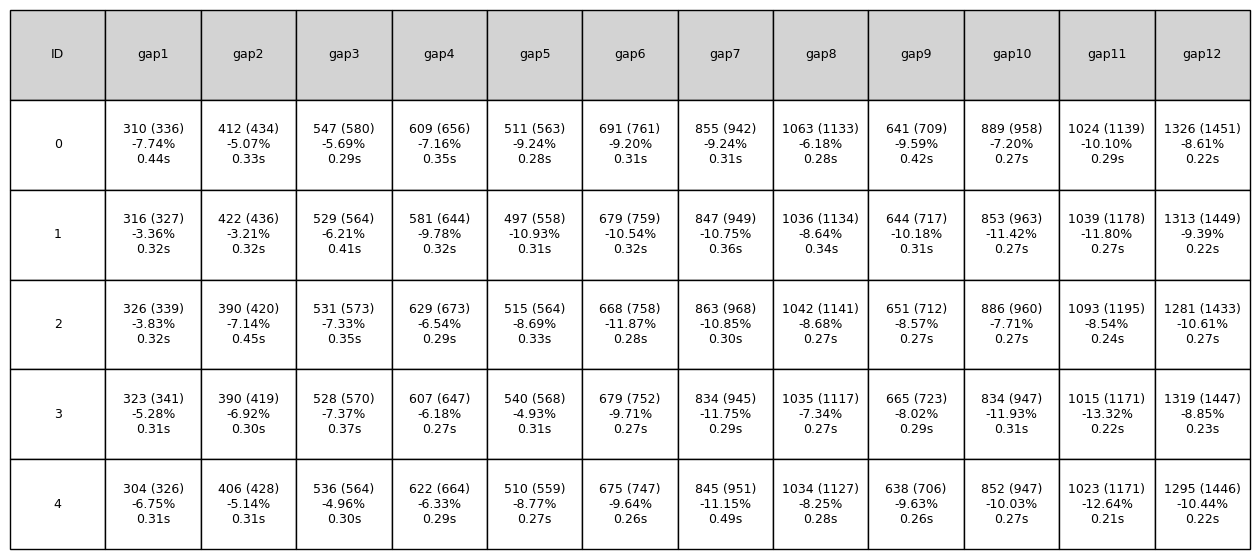

Average Relative Difference: -8.45%


In [25]:
import csv
import ast
import matplotlib.pyplot as plt
from matplotlib.table import Table

# Initialize dictionary to store results
results = {}

# Load optimal values from the new `val_opt.csv` format
optimal_values = {}  # Dictionary to store optimal values by (instance, ID)
with open("val_opt.csv", mode="r") as file:
    reader = csv.DictReader(file)
    
    for row in reader:
        # Use (instance, id) as the key; `id` remains as a string to match the format
        instance_id = (row['instance'], row['id'])
        optimal_values[instance_id] = int(row['val'])  # Store the `val` as an integer

# Load the results from the first CSV file and organize them in the results dictionary
with open("resultats_T/optimal_evaluations_gloutonne.csv", mode="r") as file:
    reader = csv.reader(file)
    header = next(reader)
    
    for row in reader:
        instance_name = row[0]  # Instance name (e.g., gapa)
        run_id = str(int(row[1]) - 1)  # Run ID as an integer (adjusted to match your format)
        
        # Convert generation values to integers and find the best (last) value
        best_value = int(row[-2])
        
        # Get the execution time (last value in the row)
        execution_time = float(row[-1])  # Last value of the row represents execution time
        
        # Get the optimal value for the instance and run ID
        optimal_value = optimal_values.get((instance_name, run_id), None)
        
        # If both best_value and optimal_value are found, store the results
        if optimal_value is not None and best_value is not None:
            # Calculate the difference and relative difference
            difference = best_value - optimal_value
            relative_difference = (difference / optimal_value) * 100 if optimal_value != 0 else None
            
            # Store the results in the results dictionary
            if instance_name not in results:
                results[instance_name] = {}
            results[instance_name][run_id] = {
                'optimal_value': optimal_value,
                'best_value': best_value,
                'difference': difference,
                'relative_difference': relative_difference,
                'execution_time': execution_time
            }

# Prepare the data for the matplotlib table
columns = ['ID'] + list(results.keys())
rows = []

# Find all run IDs
run_ids = set(run_id for instance in results.values() for run_id in instance.keys())
run_ids = sorted(run_ids)  # Sort the Run IDs

# Add data rows
for run_id in run_ids:
    row = [run_id]
    for instance_name in results:
        if run_id in results[instance_name]:
            data = results[instance_name][run_id]
            cell_content = (f'{data['best_value']} ({data['optimal_value']})\n'
                       f'{data['relative_difference']:.2f}%\n'
                       f'{data['execution_time']:.2f}s'
                       )
            row.append(cell_content)  # Add best value to row
        else:
            row.append('')  # Add empty cell if data is missing
    rows.append(row)

# Create the plot and add the table
fig, ax = plt.subplots(figsize=(16, 7))  # Adjust figure size based on number of rows
ax.axis('off')  # Turn off the axis

# Create the table
table = Table(ax, bbox=[0, 0, 1, 1])

# Add column labels
for col, column_name in enumerate(columns):
    table.add_cell(0, col, width=1.0 / len(columns), height=1.0 / len(rows), text=column_name, loc='center', facecolor='lightgray')

# Add row labels and data cells
for row_num, row in enumerate(rows):
    for col_num, cell_value in enumerate(row):
        table.add_cell(row_num + 1, col_num, width=1.0 / len(columns), height=1.0 / len(rows), text=cell_value, loc='center')

# Add the table to the axis
ax.add_table(table)

# Display the plot
plt.show()


# Calculate the average relative difference
total_relative_difference = 0
relative_difference_count = 0

for instance_data in results.values():
    for run_data in instance_data.values():
        if run_data['relative_difference'] is not None:
            total_relative_difference += run_data['relative_difference']
            relative_difference_count += 1

average_relative_difference = total_relative_difference / relative_difference_count if relative_difference_count > 0 else 0

# Print the average relative difference
print(f'Average Relative Difference: {average_relative_difference:.2f}%')

In [6]:
import init_sol
import operations_algo_genetique as op
import numpy as np
import time
import os
import csv

files = [f'gap{i}.txt' for i in ['a','b','c','d']]
max_time = 10
max_amelio = 0.1
taille_pop = 20
Nb_gen_max = 100

# Initialize data storage for each instance's results
results_min = []

# Run the evolution process for each file and collect optimal evaluation values
for file in files:
    instance = file[:-4]
    for id in range(6):
        if not (file=='gapd.txt' and id==10):
            print(f"Processing {instance} run {id}")
            Pb1 = init_sol.Pb("instances/" + file, id)

        # Run the evolution function and get the list of best solutions (Bests)
        s = time.time()
        best = op.best_element(init_sol.fam_sols(Pb1,'min',taille_pop),Pb1,critere='min')
        delta = time.time() - s
        # Extract only the evaluation values from the Bests list
        best_evals = best[1] # Collect only evaluation values

        # Save instance name, run ID, and best evaluation values to all_results
        results_min.append([instance, id + 1] + [best_evals] + [str(delta)])

# Define headers for CSV, including generation numbers for optimal values
headers = ["Instance", "Run_ID"] + ["Res"]

# Write the results to a single CSV file
with open("resultats_T/optimal_evaluations_glout_min.csv", mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(headers)  # Write the header row
    writer.writerows(results_min)  # Write all instance results

print("Optimal evaluation results have been saved to optimal_evaluations.csv")

Processing gapa run 0
Processing gapa run 1
Processing gapa run 2
Processing gapa run 3
Processing gapa run 4
Processing gapa run 5
Processing gapb run 0
Processing gapb run 1
Processing gapb run 2
Processing gapb run 3
Processing gapb run 4
Processing gapb run 5
Processing gapc run 0
Processing gapc run 1
Processing gapc run 2
Processing gapc run 3
Processing gapc run 4
Processing gapc run 5
Processing gapd run 0


TypeError: 'NoneType' object is not subscriptable

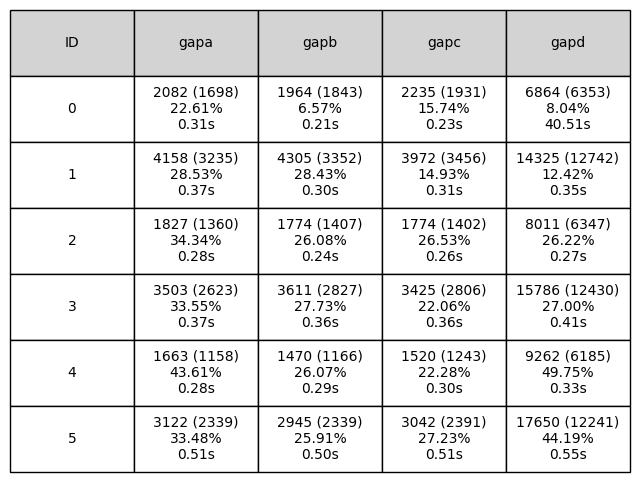

Average Relative Difference: 26.39%


In [24]:
import csv
import ast
import matplotlib.pyplot as plt
from matplotlib.table import Table

# Initialize dictionary to store results
results = {}

# Load optimal values from the new `val_opt.csv` format
optimal_values = {}  # Dictionary to store optimal values by (instance, ID)
with open("val_opt.csv", mode="r") as file:
    reader = csv.DictReader(file)
    
    for row in reader:
        # Use (instance, id) as the key; `id` remains as a string to match the format
        instance_id = (row['instance'], row['id'])
        optimal_values[instance_id] = int(row['val'])  # Store the `val` as an integer

# Load the results from the first CSV file and organize them in the results dictionary
with open("resultats_T/optimal_evaluations_glout_min.csv", mode="r") as file:
    reader = csv.reader(file)
    header = next(reader)
    
    for row in reader:
        instance_name = row[0]  # Instance name (e.g., gapa)
        run_id = str(int(row[1]) - 1)  # Run ID as an integer (adjusted to match your format)
        
        # Convert generation values to integers and find the best (last) value
        best_value = int(row[-2])
        
        # Get the execution time (last value in the row)
        execution_time = float(row[-1])  # Last value of the row represents execution time
        
        # Get the optimal value for the instance and run ID
        optimal_value = optimal_values.get((instance_name, run_id), None)
        
        # If both best_value and optimal_value are found, store the results
        if optimal_value is not None and best_value is not None:
            # Calculate the difference and relative difference
            difference = best_value - optimal_value
            relative_difference = (difference / optimal_value) * 100 if optimal_value != 0 else None
            
            # Store the results in the results dictionary
            if instance_name not in results:
                results[instance_name] = {}
            results[instance_name][run_id] = {
                'optimal_value': optimal_value,
                'best_value': best_value,
                'difference': difference,
                'relative_difference': relative_difference,
                'execution_time': execution_time
            }

# Prepare the data for the matplotlib table
columns = ['ID'] + list(results.keys())
rows = []

# Find all run IDs
run_ids = set(run_id for instance in results.values() for run_id in instance.keys())
run_ids = sorted(run_ids)  # Sort the Run IDs

# Add data rows
for run_id in run_ids:
    row = [run_id]
    for instance_name in results:
        if run_id in results[instance_name]:
            data = results[instance_name][run_id]
            cell_content = (f'{data['best_value']} ({data['optimal_value']})\n'
                       f'{data['relative_difference']:.2f}%\n'
                       f'{data['execution_time']:.2f}s'
                       )
            row.append(cell_content)  # Add best value to row
        else:
            row.append('')  # Add empty cell if data is missing
    rows.append(row)

# Create the plot and add the table
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust figure size based on number of rows
ax.axis('off')  # Turn off the axis

# Create the table
table = Table(ax, bbox=[0, 0, 1, 1])

# Add column labels
for col, column_name in enumerate(columns):
    table.add_cell(0, col, width=1.0 / len(columns), height=1.0 / len(rows), text=column_name, loc='center', facecolor='lightgray')

# Add row labels and data cells
for row_num, row in enumerate(rows):
    for col_num, cell_value in enumerate(row):
        table.add_cell(row_num + 1, col_num, width=1.0 / len(columns), height=1.0 / len(rows), text=cell_value, loc='center')

# Add the table to the axis
ax.add_table(table)

# Display the plot
plt.show()


# Calculate the average relative difference
total_relative_difference = 0
relative_difference_count = 0

for instance_data in results.values():
    for run_data in instance_data.values():
        if run_data['relative_difference'] is not None:
            total_relative_difference += run_data['relative_difference']
            relative_difference_count += 1

average_relative_difference = total_relative_difference / relative_difference_count if relative_difference_count > 0 else 0

# Print the average relative difference
print(f'Average Relative Difference: {average_relative_difference:.2f}%')

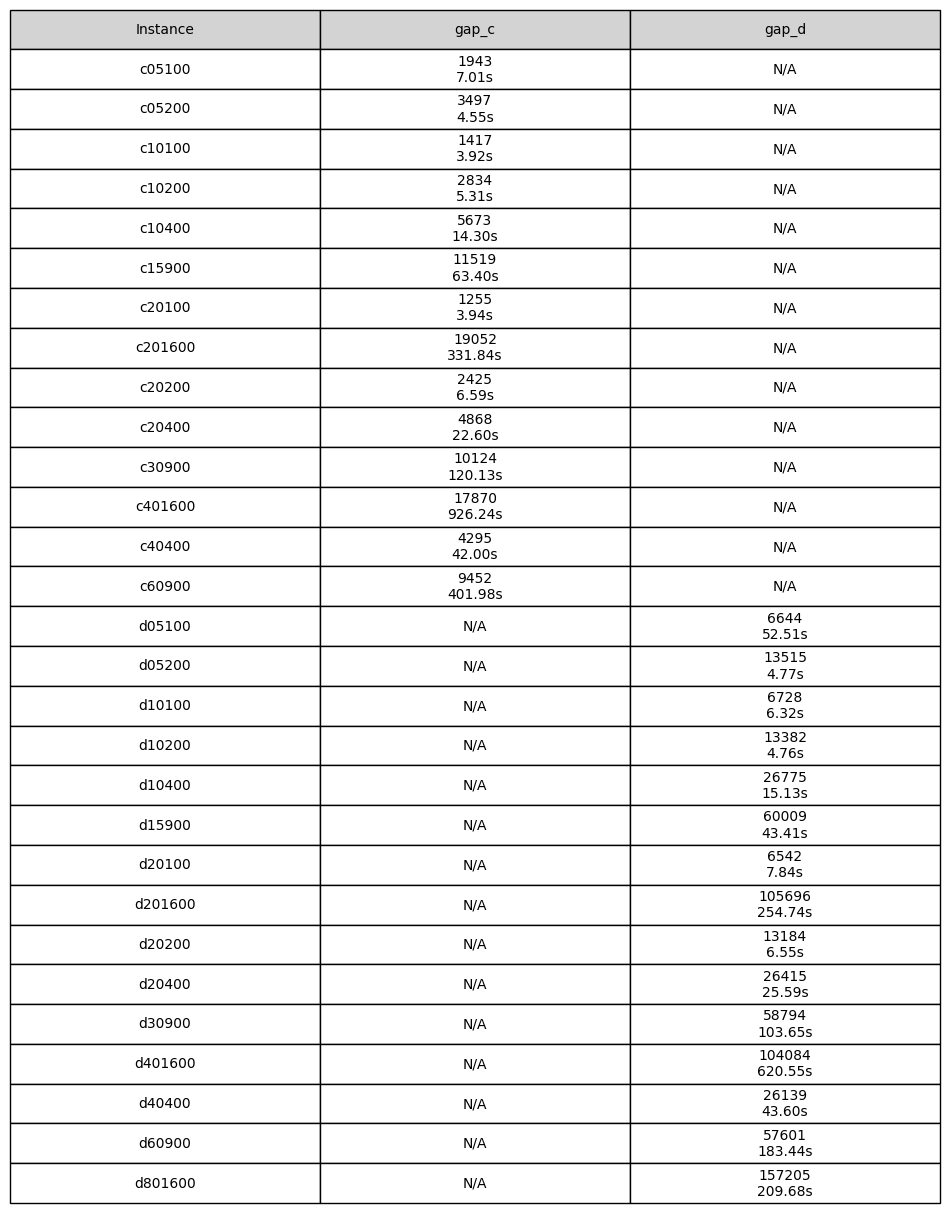

In [ ]:
import csv
import matplotlib.pyplot as plt
from matplotlib.table import Table

# Initialize dictionary to store results
results = {'gap_c/': {}, 'gap_d/': {}}

# Parse the new data format and organize the results
with open("resultats_T/optimal_evaluations_new_i.csv", mode="r") as file:
    reader = csv.reader(file)
    header = next(reader)
    
    for row in reader:
        dir_name = row[0]
        file_name = row[1][1:]

        # Extract generations and execution time if available
        gen_values = [int(val) for val in row[2:-1] if val.isdigit()]
        execution_time = float(row[-1]) if row[-1].replace('.', '', 1).isdigit() else None
        
        # Determine the best value from generations
        best_value = gen_values[-1] if gen_values else None
        
        # Store the results if best value and execution time are found
        if best_value is not None:
            results[dir_name][file_name] = {
                'best_value': best_value,
                'execution_time': execution_time
            }

# Prepare data for the table
columns = ['Instance', 'gap_c', 'gap_d']
rows = []

# Collect rows for each instance
all_instances = set(results['gap_c/'].keys()).union(results['gap_d/'].keys())
for instance in sorted(all_instances):
    gap_c_data = results['gap_c/'].get(instance, {})
    gap_d_data = results['gap_d/'].get(instance, {})

    # Format cell content with best value and execution time
    gap_c_content = (f"{gap_c_data.get('best_value', 'N/A')}\n"
                     f"{gap_c_data.get('execution_time', 'N/A'):.2f}s" if gap_c_data else "N/A")
    gap_d_content = (f"{gap_d_data.get('best_value', 'N/A')}\n"
                     f"{gap_d_data.get('execution_time', 'N/A'):.2f}s" if gap_d_data else "N/A")

    rows.append([instance, gap_c_content, gap_d_content])

# Create the plot and add the table
fig, ax = plt.subplots(figsize=(12, len(rows) * 0.5 + 1))
ax.axis('off')  # Turn off the axis

# Create the table
table = Table(ax, bbox=[0, 0, 1, 1])

# Add column headers
for col, column_name in enumerate(columns):
    table.add_cell(0, col, width=0.3, height=0.05, text=column_name, loc='center', facecolor='lightgray')

# Add data rows
for row_num, row_data in enumerate(rows, start=1):
    for col_num, cell_value in enumerate(row_data):
        table.add_cell(row_num, col_num, width=0.3, height=0.05, text=cell_value, loc='center')

# Add the table to the axis
ax.add_table(table)

# Display the plot
plt.show()